# This is the Final Project for IBM capstone. Geospatial data, Zillow house price data, and foursquare venue data will be analyzed to determine the best zip code to start a business.

In [26]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Load Zillow house value data

In [27]:
df = pd.read_csv('Zip_Zhvi_Summary_AllHomes.csv')
df.head()

Date  RegionID  RegionName State                             Metro  \
0  9/30/2019     61639       10025    NY       New York-Newark-Jersey City   
1  9/30/2019     84654       60657    IL          Chicago-Naperville-Elgin   
2  9/30/2019     61637       10023    NY       New York-Newark-Jersey City   
3  9/30/2019     91982       77494    TX  Houston-The Woodlands-Sugar Land   
4  9/30/2019     84616       60614    IL          Chicago-Naperville-Elgin   

            County      City  SizeRank     Zhvi       MoM       QoQ       YoY  \
0  New York County  New York         0   973300 -0.002460 -0.000513 -0.100213   
1      Cook County   Chicago         1   344500 -0.004335 -0.009488 -0.013742   
2  New York County  New York         2  1422300  0.005088  0.013251  0.007437   
3    Harris County      Katy         3   326700 -0.003052 -0.015667 -0.035430   
4      Cook County   Chicago         4   419200 -0.001667 -0.015962 -0.026701   

      5Year    10Year PeakMonth PeakQuarter  PeakZHVI  PctFallFromPeak  \
0  0.002568  0.025981   2016-07     2016-Q3   1136400        -0.143523   
1  0.020212  0.012685   2019-02     2019-Q1    354500        -0.028209   
2  0.000084  0.034253   2016-12     2016-Q4   1621900        -0.123066   
3  0.020139  0.028028   2018-09     2018-Q3    338700        -0.035430   
4  0.022480  0.020592   2019-02     2019-Q1    433800        -0.033656   

  LastTimeAtCurrZHVI  
0            2014-11  
1            2017-07  
2            2014-10  
3            2018-02  
4            2017-06

# Isolate Zip codes in Oregon

In [28]:
df = df[df['State']=='OR']
df.head()
#https://github.com/uber/h3-py # should use this instead of zip code.

Date  RegionID  RegionName State                         Metro  \
129  9/30/2019     99142       97229    OR  Portland-Vancouver-Hillsboro   
307  9/30/2019     99252       97402    OR                        Eugene   
457  9/30/2019     99048       97045    OR  Portland-Vancouver-Hillsboro   
493  9/30/2019     99251       97401    OR                        Eugene   
567  9/30/2019     99093       97124    OR  Portland-Vancouver-Hillsboro   

                County         City  SizeRank    Zhvi       MoM       QoQ  \
129   Multnomah County     Portland       129  561700 -0.001067 -0.004078   
307        Lane County       Eugene       307  260000  0.003861  0.014436   
457   Clackamas County  Oregon City       457  420100  0.001908 -0.000714   
493        Lane County       Eugene       493  362700  0.003320  0.011998   
567  Washington County    Hillsboro       567  397900  0.001258  0.002267   

          YoY     5Year    10Year PeakMonth PeakQuarter  PeakZHVI  \
129  0.014448  0.049479  0.040733   2019-02     2019-Q1    569100   
307  0.049233  0.086654  0.039202   2019-09     2019-Q3    260000   
457  0.025885  0.082827  0.047669   2019-05     2019-Q2    421200   
493  0.063636  0.072249  0.038788   2019-09     2019-Q3    362700   
567  0.037278  0.082089  0.048159   2019-09     2019-Q3    397900   

     PctFallFromPeak LastTimeAtCurrZHVI  
129        -0.013003            2018-12  
307         0.000000            2019-09  
457        -0.002612            2019-03  
493         0.000000            2019-09  
567         0.000000            2019-09

# Get the coordinates for Portland. Get latitude and longitude for every zip code, takes a long time, dont do again.

In [29]:
import geocoder 
g = geocoder.google( 'Portland, OR')
g.json
print(g.json)
address = 'Portland, OR'

geolocator = Nominatim(user_agent="portland_analysis")
location = geolocator.geocode(address)
#location = geolocator.geocode('97006')
platitude = location.latitude
plongitude = location.longitude
print('The geograpical coordinate of Portland are {}, {}.'.format(platitude, plongitude))

None
The geograpical coordinate of Portland are 45.5202471, -122.6741949.


In [30]:
'''
lat_long = list()
for zips in df['RegionName']:
    print(str(zips))
    location = geolocator.geocode(zips)
    #location = geolocator.geocode('97006')
    latitude = location.latitude
    longitude = location.longitude
    lat_long.append({'Latitude':latitude,'Longitude':longitude})
lat_long_df = pd.DataFrame.from_dict(lat_long)
'''

"\nlat_long = list()\nfor zips in df['RegionName']:\n    print(str(zips))\n    location = geolocator.geocode(zips)\n    #location = geolocator.geocode('97006')\n    latitude = location.latitude\n    longitude = location.longitude\n    lat_long.append({'Latitude':latitude,'Longitude':longitude})\nlat_long_df = pd.DataFrame.from_dict(lat_long)\n"

In [31]:
#df_lat_long = pd.concat([df.reset_index(),lat_long_df],axis=1)
#df_lat_long.head()
#df_lat_long.to_csv('Zip_Zhvi_Summary_AllHomesWithGeoCoord.csv')
df_lat_long = pd.read_csv(r'Zip_Zhvi_Summary_AllHomesWithGeoCoord.csv')

# Setup Foursquare Login

In [32]:
CLIENT_ID = '5RXM2XRSCY2Z4IXZUZSI30OM3XJCGY1T4GJGYP5FJN1HNRRP' # your Foursquare ID
CLIENT_SECRET = 'VQDSVD20GKEA5C4Z5B35GRJJ4OD1EBGETSEMAMLUUACJKZ4S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 5RXM2XRSCY2Z4IXZUZSI30OM3XJCGY1T4GJGYP5FJN1HNRRP
CLIENT_SECRET:VQDSVD20GKEA5C4Z5B35GRJJ4OD1EBGETSEMAMLUUACJKZ4S


# Create map of Portland using latitude and longitude values only keep metros with Portland-Vancouver-Hillsboro in name

In [33]:
df_lat_long =df_lat_long[df_lat_long['Metro'].astype(str).str.contains('Portland')]
mappy = folium.Map(location=[platitude, plongitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_lat_long['Latitude'], df_lat_long['Longitude'], df_lat_long['Zhvi'], df_lat_long['Metro']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mappy)  
    
mappy

# Show Zillow Data with latitude and longitude. For some reason some of the lattitude and longitudes are way off.

In [34]:
portland_data =df_lat_long
portland_data

Unnamed: 0  index       Date  RegionID  RegionName State  \
0             0    129  9/30/2019     99142       97229    OR   
2             2    457  9/30/2019     99048       97045    OR   
4             4    567  9/30/2019     99093       97124    OR   
6             6    645  9/30/2019     99120       97206    OR   
9             9    765  9/30/2019     99137       97223    OR   
13           13   1031  9/30/2019     99116       97202    OR   
14           14   1042  9/30/2019     99012       97006    OR   
15           15   1100  9/30/2019     99013       97007    OR   
17           17   1306  9/30/2019     99092       97123    OR   
20           20   1467  9/30/2019     99034       97030    OR   
21           21   1475  9/30/2019     99133       97219    OR   
24           24   1691  9/30/2019     99131       97217    OR   
25           25   1796  9/30/2019     99138       97224    OR   
26           26   1831  9/30/2019     99072       97080    OR   
27           27   1860  9/30/2019     99136       97222    OR   
28           28   1883  9/30/2019     99143       97230    OR   
30           30   2049  9/30/2019     99096       97128    OR   
31           31   2146  9/30/2019     99123       97209    OR   
34           34   2237  9/30/2019     99128       97214    OR   
38           38   2407  9/30/2019     99146       97233    OR   
39           39   2499  9/30/2019     99127       97213    OR   
40           40   2630  9/30/2019     99125       97211    OR   
42           42   2689  9/30/2019     99147       97236    OR   
50           50   3066  9/30/2019     99160       97267    OR   
51           51   3120  9/30/2019     99117       97203    OR   
52           52   3125  9/30/2019     99159       97266    OR   
54           54   3358  9/30/2019     99066       97070    OR   
55           55   3375  9/30/2019     99014       97008    OR   
56           56   3398  9/30/2019     99060       97062    OR   
58           58   3537  9/30/2019     99099       97132    OR   
59           59   3585  9/30/2019     99134       97220    OR   
60           60   3602  9/30/2019     99139       97225    OR   
61           61   3614  9/30/2019    399686       97086    OR   
62           62   3693  9/30/2019     99065       97068    OR   
63           63   3756  9/30/2019     99039       97035    OR   
64           64   3799  9/30/2019     99126       97212    OR   
65           65   3869  9/30/2019     99011       97005    OR   
66           66   4004  9/30/2019     99115       97201    OR   
68           68   4074  9/30/2019    738092       97003    OR   
72           72   4676  9/30/2019     99020       97015    OR   
74           74   4810  9/30/2019     99149       97239    OR   
77           77   4993  9/30/2019     99018       97013    OR   
80           80   5210  9/30/2019     99038       97034    OR   
84           84   5635  9/30/2019     99145       97232    OR   
87           87   5788  9/30/2019     99055       97055    OR   
90           90   5961  9/30/2019     99059       97060    OR   
91           91   5985  9/30/2019     99129       97215    OR   
92           92   6251  9/30/2019     99124       97210    OR   
93           93   6458  9/30/2019     99052       97051    OR   
98           98   6721  9/30/2019     99130       97216    OR   
99           99   6823  9/30/2019     99042       97038    OR   
106         106   7218  9/30/2019     99132       97218    OR   
108         108   7318  9/30/2019     99119       97205    OR   
109         109   7428  9/30/2019     99056       97056    OR   
111         111   7631  9/30/2019     99029       97024    OR   
112         112   7633  9/30/2019     99031       97027    OR   
113         113   7778  9/30/2019     99135       97221    OR   
116         116   8040  9/30/2019     99028       97023    OR   
119         119   8240  9/30/2019    399687       97089    OR   
134         134   9113  9/30/2019     99015       97009    OR   
140         140   9824  9/30/2019     99

In [35]:
neighborhood_latitude = portland_data.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = portland_data.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = portland_data.loc[2, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Oregon City are 45.336115800202705, -122.574544939973.


In [41]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
#\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5RXM2XRSCY2Z4IXZUZSI30OM3XJCGY1T4GJGYP5FJN1HNRRP&client_secret=VQDSVD20GKEA5C4Z5B35GRJJ4OD1EBGETSEMAMLUUACJKZ4S&v=20180605&ll=45.336115800202705,-122.574544939973&radius=500&limit=100'

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dde165747b43d00230eede0'},
 'response': {'headerLocation': 'Oregon City',
  'headerFullLocation': 'Oregon City',
  'headerLocationGranularity': 'city',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 45.34061580470271,
    'lng': -122.56815526115462},
   'sw': {'lat': 45.3316157957027, 'lng': -122.58093461879137}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58a427f6abb86a21a1703018',
       'name': 'Dish Network',
       'location': {'lat': 45.33679146782101,
        'lng': -122.57161286051995,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.33679146782101,
          'lng': -122.57161286051995}],
        'distance': 241,
        'postalCode': '97045',
        'cc': 'US',
        'city': 'Oregon City'

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name        categories        lat         lng
0               Dish Network  Business Service  45.336791 -122.571613
1               Dish Network  Business Service  45.337848 -122.572349
2   Management By Design Inc  Business Service  45.334829 -122.577724
3  Top Shot Surface Cleaning      Home Service  45.337712 -122.570193
4                     Redbox       Video Store  45.339900 -122.577800

In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [47]:
# type your answer here
portland_venues = getNearbyVenues(names=portland_data['RegionName'],
                                   latitudes=portland_data['Latitude'],
                                   longitudes=portland_data['Longitude'])

97229
97045
97124
97206
97223
97202
97006
97007
97123
97030
97219
97217
97224
97080
97222
97230
97128
97209
97214
97233
97213
97211
97236
97267
97203
97266
97070
97008
97062
97132
97220
97225
97086
97068
97035
97212
97005
97201
97003
97015
97239
97013
97034
97232
97055
97060
97215
97210
97051
97216
97038
97218
97205
97056
97024
97027
97221
97023
97089
97009
97048
97227
97016
97378
97133
97119
97231
97004
97114
97106
97115
97127
97064
97022
97101
97148
97396
97111
97019
97053
97042
97017
97049
97018
97011
97028


In [48]:
print(portland_venues.shape)
portland_venues.head()
portland_venues

(801, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           97229              14.538273              -61.042046   
1           97229              14.538273              -61.042046   
2           97229              14.538273              -61.042046   
3           97229              14.538273              -61.042046   
4           97045              45.336116             -122.574545   
5           97045              45.336116             -122.574545   
6           97045              45.336116             -122.574545   
7           97045              45.336116             -122.574545   
8           97045              45.336116             -122.574545   
9           97124              45.542860             -122.885374   
10          97124              45.542860             -122.885374   
11          97124              45.542860             -122.885374   
12          97124              45.542860             -122.885374   
13          97124              45.542860             -122.885374   
14          97206              45.483502             -122.599246   
15          97206              45.483502             -122.599246   
16          97206              45.483502             -122.599246   
17          97223              48.704448               18.398049   
18          97223              48.704448               18.398049   
19          97202              45.501473             -122.645704   
20          97202              45.501473             -122.645704   
21          97202              45.501473             -122.645704   
22          97202              45.501473             -122.645704   
23          97202              45.501473             -122.645704   
24          97202              45.501473             -122.645704   
25          97202              45.501473             -122.645704   
26          97202              45.501473             -122.645704   
27          97202              45.501473             -122.645704   
28          97202              45.501473             -122.645704   
29          97202              45.501473             -122.645704   
30          97202              45.501473             -122.645704   
31          97202              45.501473             -122.645704   
32          97202              45.501473             -122.645704   
33          97202              45.501473             -122.645704   
34          97202              45.501473             -122.645704   
35          97202              45.501473             -122.645704   
36          97202              45.501473             -122.645704   
37          97202              45.501473             -122.645704   
38          97202              45.501473             -122.645704   
39          97202              45.501473             -122.645704   
40          97202              45.501473             -122.645704   
41          97202              45.501473             -122.645704   
42          97202              45.501473             -122.645704   
43          97202              45.501473             -122.645704   
44          97202              45.501473             -122.645704   
45          97202              45.501473             -122.645704   
46          97202              45.501473             -122.645704   
47          97202              45.501473             -122.645704   
48          97202              45.501473             -122.645704   
49          97202              45.501473             -122.645704   
50          97202              45.501473             -122.645704   
51          97202              45.501473             -122.645704   
52          97006              45.531960             -122.870321   
53          97006              45.531960             -122.870321   
54          97006              45.531960             -122.870321   
55          97006              45.531960             -122.870321   
56          97006              45.531960             -122.870321   
57          97006              45.531960             -122.870

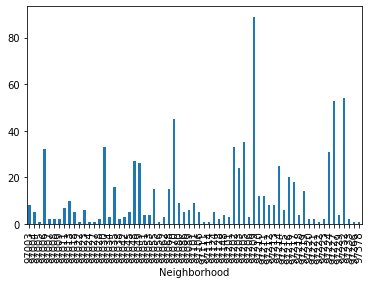

In [57]:
# Plot the number of venues for each zip code.
portland_venues.groupby('Neighborhood').count()['Venue'].plot(kind='bar')

In [58]:
portland_venues.loc[portland_venues['Neighborhood']==portland_venues.groupby('Neighborhood').count()['Venue'].idxmax(),:]

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
194         97209               45.52788             -122.684923   
195         97209               45.52788             -122.684923   
196         97209               45.52788             -122.684923   
197         97209               45.52788             -122.684923   
198         97209               45.52788             -122.684923   
199         97209               45.52788             -122.684923   
200         97209               45.52788             -122.684923   
201         97209               45.52788             -122.684923   
202         97209               45.52788             -122.684923   
203         97209               45.52788             -122.684923   
204         97209               45.52788             -122.684923   
205         97209               45.52788             -122.684923   
206         97209               45.52788             -122.684923   
207         97209               45.52788             -122.684923   
208         97209               45.52788             -122.684923   
209         97209               45.52788             -122.684923   
210         97209               45.52788             -122.684923   
211         97209               45.52788             -122.684923   
212         97209               45.52788             -122.684923   
213         97209               45.52788             -122.684923   
214         97209               45.52788             -122.684923   
215         97209               45.52788             -122.684923   
216         97209               45.52788             -122.684923   
217         97209               45.52788             -122.684923   
218         97209               45.52788             -122.684923   
219         97209               45.52788             -122.684923   
220         97209               45.52788             -122.684923   
221         97209               45.52788             -122.684923   
222         97209               45.52788             -122.684923   
223         97209               45.52788             -122.684923   
224         97209               45.52788             -122.684923   
225         97209               45.52788             -122.684923   
226         97209               45.52788             -122.684923   
227         97209               45.52788             -122.684923   
228         97209               45.52788             -122.684923   
229         97209               45.52788             -122.684923   
230         97209               45.52788             -122.684923   
231         97209               45.52788             -122.684923   
232         97209               45.52788             -122.684923   
233         97209               45.52788             -122.684923   
234         97209               45.52788             -122.684923   
235         97209               45.52788             -122.684923   
236         97209               45.52788             -122.684923   
237         97209               45.52788             -122.684923   
238         97209               45.52788             -122.684923   
239         97209               45.52788             -122.684923   
240         97209               45.52788             -122.684923   
241         97209               45.52788             -122.684923   
242         97209               45.52788             -122.684923   
243         97209               45.52788             -122.684923   
244         97209               45.52788             -122.684923   
245         97209               45.52788             -122.684923   
246         97209               45.52788             -122.684923   
247         97209               45.52788             -122.684923   
248         97209               45.52788             -122.684923   
249         97209               45.52788             -122.684923   
250         97209               45.52788             -122.684923   
251         97209               45.52788             -122.684

In [59]:
print('There are {} uniques categories.'.format(len(portland_venues['Venue Category'].unique())))

There are 205 uniques categories.


In [60]:
# one hot encoding
portland_onehot = pd.get_dummies(portland_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
portland_onehot['Neighborhood'] = portland_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [portland_onehot.columns[-1]] + list(portland_onehot.columns[:-1])
portland_onehot = portland_onehot[fixed_columns]

portland_onehot.head()

Neighborhood  ATM  American Restaurant  Amphitheater  Antique Shop  Arcade  \
0         97229    0                    0             0             0       0   
1         97229    0                    0             0             0       0   
2         97229    0                    0             0             0       0   
3         97229    0                    0             0             0       0   
4         97045    0                    0             0             0       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    0                 0                   0   

   Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0              0                0          0           0       0     0    0   
1              0                0          0           0       0     0    0   
2              0                0          0           0       0     0    0   
3              0                0          0           0       0     0    0   
4              0                0          0           0       0     0    0   

   Basketball Court  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0                 0      0                0         0           0   
1                 0      0                1         0           0   
2                 0      0                0         0           0   
3                 0      0                0         0           0   
4                 0      0                0         0           0   

   Belgian Restaurant  Bike Shop  Boat or Ferry  Bookstore  Boutique  \
0                   0          0              0          0         0   
1                   0          0              0          0         0   
2                   0          0              0          0         0   
3                   0          0              0          0         0   
4                   0          0              0          0         0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Burger Joint  \
0               0        0       0                0             0   
1               0        0       0                0             0   
2               0        0       0                0             0   
3               0        0       0                0             0   
4               0        0       0                0             0   

   Burrito Place  Bus Station  Bus Stop  Business Service  Café  Camera Store  \
0              0            0         0                 0     0             0   
1              0            0         0                 0     0             0   
2              0            0         0                 0     0             0   
3              0            0         0                 0     0             0   
4              0            0         0                 1     0             0   

   Candy Store  Cheese Shop  Chinese Restaurant  Chiropractor  Chocolate Shop  \
0            0            0                   0             0               0   
1            0            0                   0             0               0   
2            0            0                   0             0               0   
3            0            0                   0             0               0   
4            0            0                   0             0               0   

   Clothing Store  Cocktail Bar  Coffee Shop  Comedy Club  Comic Shop  \
0               0             0            0            0           0   
1               0             0            0            0           0   
2               0             0            0            0           0   
3               0             0            0     

In [61]:
portland_onehot.shape

(801, 206)

The mean of each 1-hot encoded variable w.r.t. neighborhood
represents its fraction out of the number of categories.

In [62]:
portland_grouped = portland_onehot.groupby('Neighborhood').mean().reset_index()
portland_grouped.head()

Neighborhood  ATM  American Restaurant  Amphitheater  Antique Shop  Arcade  \
0         97003  0.0               0.0000           0.0           0.0     0.0   
1         97004  0.0               0.0000           0.0           0.0     0.0   
2         97005  0.0               0.0000           0.0           0.0     0.0   
3         97006  0.0               0.0625           0.0           0.0     0.0   
4         97007  0.0               0.0000           0.0           0.0     0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0           0.00000                 0.0   
1          0.0                  0.0           0.20000                 0.0   
2          0.0                  0.0           0.00000                 0.0   
3          0.0                  0.0           0.03125                 0.0   
4          0.0                  0.0           0.00000                 0.0   

   Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0          0.125              0.0    0.00000     0.00000     0.0   0.0  0.0   
1          0.000              0.0    0.00000     0.00000     0.0   0.0  0.0   
2          0.000              0.0    0.00000     0.00000     0.0   0.0  0.0   
3          0.000              0.0    0.03125     0.03125     0.0   0.0  0.0   
4          0.000              0.0    0.00000     0.00000     0.0   0.0  0.0   

   Basketball Court  Beach  Bed & Breakfast  Beer Bar  Beer Store  \
0               0.0    0.0              0.0       0.0         0.0   
1               0.0    0.0              0.0       0.0         0.0   
2               0.0    0.0              0.0       0.0         0.0   
3               0.0    0.0              0.0       0.0         0.0   
4               0.0    0.0              0.0       0.0         0.0   

   Belgian Restaurant  Bike Shop  Boat or Ferry  Bookstore  Boutique  \
0                 0.0        0.0            0.0        0.0       0.0   
1                 0.0        0.0            0.0        0.0       0.0   
2                 0.0        0.0            0.0        0.0       0.0   
3                 0.0        0.0            0.0        0.0       0.0   
4                 0.0        0.0            0.0        0.0       0.0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Burger Joint  \
0             0.0      0.0     0.0          0.00000       0.00000   
1             0.2      0.0     0.0          0.00000       0.00000   
2             0.0      0.0     0.0          0.00000       0.00000   
3             0.0      0.0     0.0          0.03125       0.03125   
4             0.0      0.0     0.0          0.00000       0.00000   

   Burrito Place  Bus Station  Bus Stop  Business Service  Café  Camera Store  \
0            0.0      0.00000       0.0               0.0   0.0           0.0   
1            0.0      0.00000       0.0               0.0   0.4           0.0   
2            0.0      0.00000       0.0               0.0   0.0           0.0   
3            0.0      0.03125       0.0               0.0   0.0           0.0   
4            0.0      0.00000       0.0               0.0   0.0           0.0   

   Candy Store  Cheese Shop  Chinese Restaurant  Chiropractor  Chocolate Shop  \
0          0.0          0.0                 0.0           0.0             0.0   
1          0.0          0.0                 0.0           0.0             0.0   
2          0.0          0.0                 0.0           0.0             0.0   
3          0.0          0.0                 0.0           0.0             0.0   
4          0.0          0.0                 0.0           0.0             0.0   

   Clothing Store  Cocktail Bar  Coffee Shop  Comedy Club  Comic Shop  \
0             0.0           0.0       0.0000          0.0         0.0   
1             0.0           0.0       0.0000          0.0         0.0   
2             0.0           0.0       0.0000          0.0         0.0   
3             0.0           0.0       0.0625     

In [63]:
# Return the shape of the grouped dataframe.
portland_grouped.shape

(67, 206)

Grouping the frequency dataframe by neighborhood, then sorting by frequency to find the top 5 most popular venues for each neighborhood.

In [64]:
num_top_venues = 10
freq_rest = list()
for hood in portland_grouped['Neighborhood']:
    #print("----"+str(hood)+"----")
    temp = portland_grouped[portland_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp['Neighborhood']= hood
    temp = temp.round({'freq': 3})
    venue_stat = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues).T
    freq_rest.append(venue_stat)
    print(venue_stat)
    print('\n')

                       0      1              2              3      4  \
venue         Playground   Park  Deli / Bodega  Auto Workshop    Gym   
freq                0.25   0.25          0.125          0.125  0.125   
Neighborhood       97003  97003          97003          97003  97003   

                              5                      6            7  \
venue         Other Repair Shop  Performing Arts Venue  Music Venue   
freq                      0.125                      0            0   
Neighborhood              97003                  97003        97003   

                                    8             9  
venue         New American Restaurant  Night Market  
freq                                0             0  
Neighborhood                    97003         97003  


                  0               1                 2  \
venue          Café  Breakfast Spot  Asian Restaurant   
freq            0.4             0.2               0.2   
Neighborhood  97004           97004  

Neighborhood                 97048     97048  


                               0      1                 2             3  \
venue         Chinese Restaurant  Hotel  Asian Restaurant  Dessert Shop   
freq                       0.154  0.115             0.077         0.077   
Neighborhood               97049  97049             97049         97049   

                                   4                     5           6  \
venue         Furniture / Home Store  Fast Food Restaurant  Public Art   
freq                           0.038                 0.038       0.038   
Neighborhood                   97049                 97049       97049   

                               7         8                 9  
venue         Mexican Restaurant  Tea Room  Department Store  
freq                       0.038     0.038             0.038  
Neighborhood               97049     97049             97049  


                        0            1         2                   3      4  \
venue         Video 

                        0                   1      2                 3      4  \
venue         Pizza Place  Italian Restaurant    Bar  Sushi Restaurant    Spa   
freq                0.121               0.061  0.061             0.061   0.03   
Neighborhood        97202               97202  97202             97202  97202   

                               5         6                7         8  \
venue         Mexican Restaurant  Boutique  Bubble Tea Shop  Bus Stop   
freq                        0.03      0.03             0.03      0.03   
Neighborhood               97202     97202            97202     97202   

                           9  
venue         Soccer Stadium  
freq                    0.03  
Neighborhood           97202  


                       0            1      2            3                   4  \
venue         Food Truck  Coffee Shop   Bank  Yoga Studio  Falafel Restaurant   
freq               0.125        0.083  0.083        0.042               0.042   
Neighborhood 

                        0               1                     2  \
venue         Coffee Shop  Cosmetics Shop  Fast Food Restaurant   
freq                0.097           0.065                 0.065   
Neighborhood        97224           97224                 97224   

                          3                   4      5                   6  \
venue         Grocery Store  Salon / Barbershop    ATM  Chinese Restaurant   
freq                  0.065               0.065  0.032               0.032   
Neighborhood          97224               97224  97224               97224   

                  7        8               9  
venue           Pub  Brewery  Shipping Store  
freq          0.032    0.032           0.032  
Neighborhood  97224    97224           97224  


                        0      1                   2             3        4  \
venue         Pizza Place    Bar  Mexican Restaurant  Cocktail Bar  Brewery   
freq                0.057  0.057               0.038         0.038    

In [65]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Make a dataframe ranking the most common venues with the name of each category 

In [66]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = portland_grouped['Neighborhood']

for ind in np.arange(portland_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(portland_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0         97003                  Park                     Playground   
1         97004                  Café  Vegetarian / Vegan Restaurant   
2         97005                 River                    Yoga Studio   
3         97006  Fast Food Restaurant                    Pizza Place   
4         97007          Home Service              Mobile Phone Shop   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Deli / Bodega                   Gym         Auto Workshop   
1             Asian Restaurant        Breakfast Spot           Yoga Studio   
2  Eastern European Restaurant           Flea Market           Fish Market   
3             Sushi Restaurant           Coffee Shop    Mexican Restaurant   
4            Food & Drink Shop           Flower Shop           Flea Market   

  6th Most Common Venue        7th Most Common Venue  8th Most Common Venue  \
0     Other Repair Shop  Eastern European Restaurant            Fish Market   
1  Ethiopian Restaurant                  Flower Shop            Flea Market   
2  Fast Food Restaurant               Farmers Market                   Farm   
3   American Restaurant                Grocery Store  Vietnamese Restaurant   
4           Fish Market         Fast Food Restaurant         Farmers Market   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant         Farmers Market  
1           Fish Market   Fast Food Restaurant  
2    Falafel Restaurant             Eye Doctor  
3            Playground        Bubble Tea Shop  
4                  Farm     Falafel Restaurant

# Tried to find optimal K of kmeans clustering on Portland venues using elbow method, but lack of elbow suggest k-means is not suitable for data

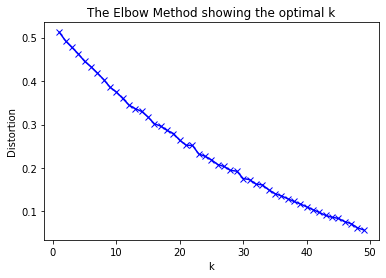

In [67]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = portland_grouped.drop('Neighborhood', 1).copy()

# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

# Isolate price-related metrics for Kmeans analysis.

In [68]:
prices = df_lat_long.reset_index()
prices.head()
pgvars=['Zhvi','MoM','QoQ','YoY']
prices_group = StandardScaler().fit_transform(prices.loc[:,pgvars])

# See if elbow can be found when doing K-means elbow analysis on pricing data.

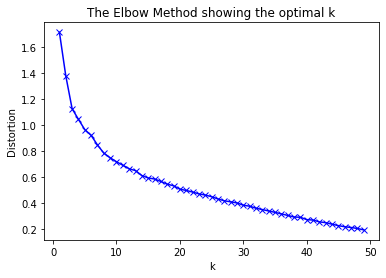

In [69]:
X = prices_group.copy()

# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# There appears to be an elbow around k=8, so we'll use that.

In [70]:
# set number of clusters
kclusters = 8

#portland_grouped_clustering = portland_grouped.drop('Neighborhood', 1)
#print(portland_grouped_clustering.shape)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)#portland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])

#df_lat_long['Cluster Labels'] = kmeans.labels_
portland_data['Cluster Labels'] = kmeans.labels_
portland_data.head()
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#print(neighborhoods_venues_sorted['Cluster Labels'].unique())

[7 0 0 6 6 3 6 0 0 0]


Unnamed: 0  index       Date  RegionID  RegionName State  \
0           0    129  9/30/2019     99142       97229    OR   
2           2    457  9/30/2019     99048       97045    OR   
4           4    567  9/30/2019     99093       97124    OR   
6           6    645  9/30/2019     99120       97206    OR   
9           9    765  9/30/2019     99137       97223    OR   

                          Metro             County         City  SizeRank  \
0  Portland-Vancouver-Hillsboro   Multnomah County     Portland       129   
2  Portland-Vancouver-Hillsboro   Clackamas County  Oregon City       457   
4  Portland-Vancouver-Hillsboro  Washington County    Hillsboro       567   
6  Portland-Vancouver-Hillsboro   Multnomah County     Portland       645   
9  Portland-Vancouver-Hillsboro  Washington County       Tigard       765   

     Zhvi       MoM       QoQ       YoY     5Year    10Year PeakMonth  \
0  561700 -0.001067 -0.004078  0.014448  0.049479  0.040733   2019-02   
2  420100  0.001908 -0.000714  0.025885  0.082827  0.047669   2019-05   
4  397900  0.001258  0.002267  0.037278  0.082089  0.048159   2019-09   
6  374900  0.001603 -0.000800 -0.014199  0.093943  0.059416   2019-02   
9  430100  0.000233  0.000233  0.011286  0.067888  0.043078   2019-01   

  PeakQuarter  PeakZHVI  PctFallFromPeak LastTimeAtCurrZHVI   Latitude  \
0     2019-Q1    569100        -0.013003            2018-12  14.538273   
2     2019-Q2    421200        -0.002612            2019-03  45.336116   
4     2019-Q3    397900         0.000000            2019-09  45.542860   
6     2019-Q1    383000        -0.021149            2018-02  45.483502   
9     2019-Q1    434400        -0.009899            2018-12  48.704448   

    Longitude  Cluster Labels  
0  -61.042046               7  
2 -122.574545               0  
4 -122.885374               0  
6 -122.599246               6  
9   18.398049               6

In [71]:
# set number of clusters
kclusters = 8

portland_grouped_clustering = portland_grouped.drop('Neighborhood', 1)
print(portland_grouped_clustering.shape)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(portland_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:8])


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
print(neighborhoods_venues_sorted['Cluster Labels'].unique())

(67, 205)
[0 0 4 0 0 0 2 0]
[0 4 2 6 7 5 1 3]


In [72]:

neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop(columns='Cluster Labels')
portland_merged = portland_data.copy()
portland_merged.columns
portland_merged = portland_merged.rename(columns={'RegionName':'Neighborhood'})
# merge portland_grouped with portland_data to add latitude/longitude for each neighborhood
portland_merged = portland_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood').dropna(how='any')
portland_merged.head() # check the last columns!

Unnamed: 0  index       Date  RegionID  Neighborhood State  \
0           0    129  9/30/2019     99142         97229    OR   
2           2    457  9/30/2019     99048         97045    OR   
4           4    567  9/30/2019     99093         97124    OR   
6           6    645  9/30/2019     99120         97206    OR   
9           9    765  9/30/2019     99137         97223    OR   

                          Metro             County         City  SizeRank  \
0  Portland-Vancouver-Hillsboro   Multnomah County     Portland       129   
2  Portland-Vancouver-Hillsboro   Clackamas County  Oregon City       457   
4  Portland-Vancouver-Hillsboro  Washington County    Hillsboro       567   
6  Portland-Vancouver-Hillsboro   Multnomah County     Portland       645   
9  Portland-Vancouver-Hillsboro  Washington County       Tigard       765   

     Zhvi       MoM       QoQ       YoY     5Year    10Year PeakMonth  \
0  561700 -0.001067 -0.004078  0.014448  0.049479  0.040733   2019-02   
2  420100  0.001908 -0.000714  0.025885  0.082827  0.047669   2019-05   
4  397900  0.001258  0.002267  0.037278  0.082089  0.048159   2019-09   
6  374900  0.001603 -0.000800 -0.014199  0.093943  0.059416   2019-02   
9  430100  0.000233  0.000233  0.011286  0.067888  0.043078   2019-01   

  PeakQuarter  PeakZHVI  PctFallFromPeak LastTimeAtCurrZHVI   Latitude  \
0     2019-Q1    569100        -0.013003            2018-12  14.538273   
2     2019-Q2    421200        -0.002612            2019-03  45.336116   
4     2019-Q3    397900         0.000000            2019-09  45.542860   
6     2019-Q1    383000        -0.021149            2018-02  45.483502   
9     2019-Q1    434400        -0.009899            2018-12  48.704448   

    Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  -61.042046               7                 Diner       Bed & Breakfast   
2 -122.574545               0      Business Service          Home Service   
4 -122.885374               0                 Hotel   American Restaurant   
6 -122.599246               6         Boat or Ferry           Art Gallery   
9   18.398049               6            Restaurant           Yoga Studio   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Golf Course           Yoga Studio     Electronics Store   
2                  Video Store     Electronics Store           Flea Market   
4                   Food Truck            Restaurant                 Track   
6                     Dive Bar           Yoga Studio  Ethiopian Restaurant   
9  Eastern European Restaurant           Flea Market           Fish Market   

         6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Flea Market           Fish Market  Fast Food Restaurant   
2                  Fish Market  Fast Food Restaurant        Farmers Market   
4  Eastern European Restaurant           Fish Market  Fast Food Restaurant   
6                  Flower Shop           Flea Market           Fish Market   
9         Fast Food Restaurant        Farmers Market                  Farm   

  9th Most Common Venue 10th Most Common Venue  
0        Farmers Market                   Farm  
2                  Farm     Falafel Restaurant  
4        Farmers Market                   Farm  
6  Fast Food Restaurant         Farmers Market  
9    Falafel Restaurant             Eye Doctor

In [73]:
import pathlib
import urllib.request
import geopandas as gpd
zipcode_gdf = gpd.read_file(r"Data\gz_2010_us_860_00_500k\gz_2010_us_860_00_500k.shp")
zipcode_gdf.loc[zipcode_gdf["ZCTA5"]=='97006',:]
portland_merged['Neighborhood']=portland_merged['Neighborhood'].astype(str)
zipcode_gdf = zipcode_gdf.rename(columns={'ZCTA5':'Neighborhood'})
zipcode_gdf['Neighborhood']=zipcode_gdf['Neighborhood'].astype(str)
portland_merged =zipcode_gdf.merge(portland_merged,on='Neighborhood')

Show zip codes

In [74]:
#portland_merged.loc[:,['Cluster Labels','Zhvi','MoM','QoQ','YoY','5Year','10Year']].groupby('Cluster Labels').describe()#.T#.plot()
portland_merged.head()
portland_merged

GEO_ID Neighborhood   NAME   LSAD  CENSUSAREA  \
0   8600000US97004        97004  97004  ZCTA5      43.784   
1   8600000US97128        97128  97128  ZCTA5     106.869   
2   8600000US97005        97005  97005  ZCTA5       5.310   
3   8600000US97007        97007  97007  ZCTA5      26.774   
4   8600000US97009        97009  97009  ZCTA5      30.592   
5   8600000US97013        97013  97013  ZCTA5      56.842   
6   8600000US97022        97022  97022  ZCTA5      24.689   
7   8600000US97028        97028  97028  ZCTA5      38.013   
8   8600000US97030        97030  97030  ZCTA5       7.546   
9   8600000US97034        97034  97034  ZCTA5       7.348   
10  8600000US97038        97038  97038  ZCTA5     125.028   
11  8600000US97042        97042  97042  ZCTA5      22.426   
12  8600000US97048        97048  97048  ZCTA5      83.490   
13  8600000US97056        97056  97056  ZCTA5      97.794   
14  8600000US97068        97068  97068  ZCTA5      22.465   
15  8600000US97086        97086  97086  ZCTA5      10.553   
16  8600000US97101        97101  97101  ZCTA5      55.435   
17  8600000US97106        97106  97106  ZCTA5      46.706   
18  8600000US97111        97111  97111  ZCTA5      38.791   
19  8600000US97148        97148  97148  ZCTA5      75.433   
20  8600000US97201        97201  97201  ZCTA5       2.033   
21  8600000US97203        97203  97203  ZCTA5       8.924   
22  8600000US97205        97205  97205  ZCTA5       0.976   
23  8600000US97210        97210  97210  ZCTA5       7.540   
24  8600000US97213        97213  97213  ZCTA5       4.045   
25  8600000US97217        97217  97217  ZCTA5      12.923   
26  8600000US97218        97218  97218  ZCTA5       6.987   
27  8600000US97219        97219  97219  ZCTA5      11.756   
28  8600000US97220        97220  97220  ZCTA5       7.186   
29  8600000US97221        97221  97221  ZCTA5       4.284   
30  8600000US97222        97222  97222  ZCTA5       8.462   
31  8600000US97223        97223  97223  ZCTA5      11.546   
32  8600000US97229        97229  97229  ZCTA5      20.561   
33  8600000US97233        97233  97233  ZCTA5       4.520   
34  8600000US97266        97266  97266  ZCTA5       6.045   
35  8600000US97378        97378  97378  ZCTA5     115.838   
36  8600000US97006        97006  97006  ZCTA5      11.749   
37  8600000US97008        97008  97008  ZCTA5       4.958   
38  8600000US97011        97011  97011  ZCTA5       5.804   
39  8600000US97018        97018  97018  ZCTA5       0.806   
40  8600000US97023        97023  97023  ZCTA5     127.499   
41  8600000US97027        97027  97027  ZCTA5       2.533   
42  8600000US97035        97035  97035  ZCTA5       6.032   
43  8600000US97045        97045  97045  ZCTA5      86.346   
44  8600000US97049        97049  97049  ZCTA5     153.771   
45  8600000US97051        97051  97051  ZCTA5      48.232   
46  8600000US97053        97053  97053  ZCTA5      13.817   
47  8600000US97055        97055  97055  ZCTA5     117.839   
48  8600000US97070        97070  97070  ZCTA5      19.080   
49  8600000US97080        97080  97080  ZCTA5      21.560   
50  8600000US97089        97089  97089  ZCTA5      21.765   
51  8600000US97114        97114  97114  ZCTA5      57.292   
52  8600000US97124        97124  97124  ZCTA5      43.081   
53  8600000US97202        97202  97202  ZCTA5       6.327   
54  8600000US97206        97206  97206  ZCTA5       6.528   
55  8600000US97209        97209  97209  ZCTA5       1.046   
56  8600000US97212        97212  97212  ZCTA5       2.729   
57  8600000US97214        97214  97214  ZCTA5       2.807   
58  8600000US97215        97215  97215  ZCTA5       2.272   
59  8600000US97216        97216  97216  ZCTA5       2.536   
60  8600000US97227        97227  97227  ZCTA5       1.341   
61  8600000US97232        97232  97232  ZCTA5       1.877   
62  8600000US97024        97024  97024  ZCTA5       3.501   
63  8600000US97062        97062  97062  ZCTA5      13.889   
64  8600000US97211        97211  97211  ZCTA5  

In [75]:
# NExt Steps: Find which restaurants are most popular in the different house value clusters.
# Also try loading the school names from the Foursquare API for each zip code and merge with their ratings.

In [76]:
print(portland_merged.head())
portland_merged.loc[portland_merged['Cluster Labels'] == 0, portland_merged.columns[[1] + list(range(5, portland_merged.shape[1]))]]

           GEO_ID Neighborhood   NAME   LSAD  CENSUSAREA  \
0  8600000US97004        97004  97004  ZCTA5      43.784   
1  8600000US97128        97128  97128  ZCTA5     106.869   
2  8600000US97005        97005  97005  ZCTA5       5.310   
3  8600000US97007        97007  97007  ZCTA5      26.774   
4  8600000US97009        97009  97009  ZCTA5      30.592   

                                            geometry  Unnamed: 0  index  \
0  POLYGON ((-122.48691 45.22227, -122.48713 45.2...         164  11669   
1  POLYGON ((-123.37052 45.23430, -123.37053 45.2...          30   2049   
2  POLYGON ((-122.81597 45.51996, -122.81594 45.5...          65   3869   
3  POLYGON ((-122.81697 45.44110, -122.81695 45.4...          15   1100   
4  MULTIPOLYGON (((-122.42359 45.39423, -122.4233...         134   9113   

        Date  RegionID State                         Metro             County  \
0  9/30/2019     99010    OR  Portland-Vancouver-Hillsboro   Clackamas County   
1  9/30/2019     99096    

Neighborhood                                           geometry  \
1         97128  POLYGON ((-123.37052 45.23430, -123.37053 45.2...   
2         97005  POLYGON ((-122.81597 45.51996, -122.81594 45.5...   
3         97007  POLYGON ((-122.81697 45.44110, -122.81695 45.4...   
5         97013  POLYGON ((-122.69282 45.30029, -122.69135 45.3...   
8         97030  POLYGON ((-122.48295 45.49196, -122.48294 45.4...   
10        97038  POLYGON ((-122.49972 44.91804, -122.50028 44.9...   
18        97111  POLYGON ((-123.32364 45.28927, -123.32368 45.2...   
33        97233  MULTIPOLYGON (((-122.49774 45.52236, -122.4979...   
43        97045  POLYGON ((-122.57108 45.39140, -122.57083 45.3...   
44        97049  POLYGON ((-121.77561 45.21625, -121.77571 45.2...   
47        97055  POLYGON ((-122.17904 45.31261, -122.17910 45.3...   
49        97080  POLYGON ((-122.48658 45.46113, -122.48950 45.4...   
52        97124  MULTIPOLYGON (((-122.89659 45.52714, -122.8965...   
62        97024  POLYGON ((-122.41693 45.56670, -122.41694 45.5...   

    Unnamed: 0  index       Date  RegionID State  \
1           30   2049  9/30/2019     99096    OR   
2           65   3869  9/30/2019     99011    OR   
3           15   1100  9/30/2019     99013    OR   
5           77   4993  9/30/2019     99018    OR   
8           20   1467  9/30/2019     99034    OR   
10          99   6823  9/30/2019     99042    OR   
18         182  12745  9/30/2019     99081    OR   
33          38   2407  9/30/2019     99146    OR   
43           2    457  9/30/2019     99048    OR   
44         210  14390  9/30/2019     99050    OR   
47          87   5788  9/30/2019     99055    OR   
49          26   1831  9/30/2019     99072    OR   
52           4    567  9/30/2019     99093    OR   
62         111   7631  9/30/2019     99029    OR   

                           Metro             County          City  SizeRank  \
1   Portland-Vancouver-Hillsboro     Yamhill County   McMinnville      2049   
2   Portland-Vancouver-Hillsboro  Washington County     Beaverton      3869   
3   Portland-Vancouver-Hillsboro  Washington County     Beaverton      1100   
5   Portland-Vancouver-Hillsboro   Clackamas County         Canby      4993   
8   Portland-Vancouver-Hillsboro   Multnomah County       Gresham      1467   
10  Portland-Vancouver-Hillsboro   Clackamas County       Molalla      6823   
18  Portland-Vancouver-Hillsboro     Yamhill County       Carlton     12745   
33  Portland-Vancouver-Hillsboro   Multnomah County      Portland      2407   
43  Portland-Vancouver-Hillsboro   Clackamas County   Oregon City       457   
44  Portland-Vancouver-Hillsboro   Clackamas County  Rhododendron     14390   
47  Portland-Vancouver-Hillsboro   Clackamas County         Sandy      5788   
49  Portland-Vancouver-Hillsboro   Multnomah County       Gresham      1831   
52  Portland-Vancouver-Hillsboro  Washington County     Hillsboro       567   
62  Portland-Vancouver-Hillsboro   Multnomah County      Fairview      7631   

      Zhvi       MoM       QoQ       YoY     5Year    10Year PeakMonth  \
1   325700  0.001846  0.000000  0.039911  0.101567  0.045613   2019-05   
2   357900  0.002521  0.012447  0.025501  0.084745  0.049343   2019-09   
3   431700  0.000695  0.003720  0.022986  0.067855  0.044656   2019-09   
5   403300  0.003483 -0.002473  0.019206  0.083720  0.045807   2019-05   
8   319600  0.001253  0.001253  0.033301  0.097737  0.050111   2019-09   
10  334200  0.003905  0.003905  0.034355  0.088209  0.047360   2019-03   
18  337900 -0.000296 -0.006176  0.043223  0.115651  0.056786   2019-03   
33  298000  0.000672 -0.004343  0.017412  0.099803  0.054432   2019-03   
43  420100  0.001908 -0.000714  0.025885  0.082827  0.047669   2019-05   
44  302200  0.002654 -0.001652  0.016482  0.111418  0.039318   2019-03   
47  358400  0.001117 -0.000279  0.025465  0.089846  0.048310   2019-04   
49  365200  0.001920  0.003572  0.025555  0.084799  0.045473   2019-09   
52  397900  0.001258  0

In [77]:
# Getting an idea of the cluster statistics to find interesting plot.
portland_merged.columns
price_stats_df = portland_merged.groupby(by='Cluster Labels').describe().loc[:,(pgvars,slice(None))]
print(price_stats_df.T.head())

Cluster Labels              0              1             2              3  \
Zhvi count          14.000000       7.000000       2.00000      11.000000   
     mean       356692.857143  319185.714286  747000.00000  504900.000000   
     std         42454.672014   36878.649133   39456.55839   54336.838333   
     min        298000.000000  261900.000000  719100.00000  420000.000000   
     25%        327825.000000  296250.000000  733050.00000  467850.000000   

Cluster Labels              4              5              6              7  
Zhvi count           3.000000       6.000000      12.000000      11.000000  
     mean       274600.000000  416216.666667  384325.000000  522554.545455  
     std         37412.832023   41402.049064   47155.489895   53296.629605  
     min        234400.000000  364600.000000  310800.000000  452800.000000  
     25%        257700.000000  388825.000000  355600.000000  484950.000000  


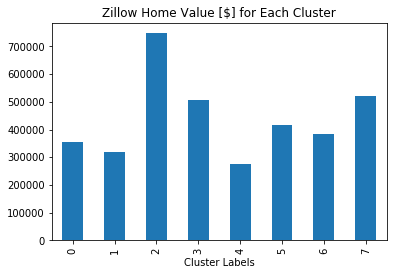

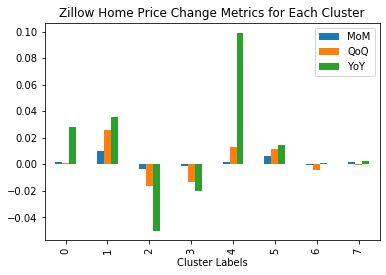

In [78]:
price_stats_df.loc[:,('Zhvi','mean')].plot(kind='bar',title='Zillow Home Value [$] for Each Cluster')
price_stats_df.loc[:,(['MoM','QoQ','YoY'],'mean')].droplevel(level=1,axis=1).\
plot(kind='bar',title='Zillow Home Price Change Metrics for Each Cluster')
#price_stats_df.loc[:,('Zhvi','count')].plot(kind='bar',title='# Of Zip codes in each cluster.')

# Cluster 4 is cheap but getting expensive fast. Cluster 2 is expensive but price is declining. Other clusters are more moderate.

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
print(x)

ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
colorlist=list()
markers_colors = []
aa=0
for lat, lon, poi, cluster,zhvi in zip(portland_merged['Latitude'],
                                       portland_merged['Longitude'],portland_merged['Neighborhood'], 
                                       portland_merged['Cluster Labels'],portland_merged['Zhvi']):
    cluster = int(cluster)
    label = folium.Popup(str(poi)+ ', Cluster ' + str(cluster) + ', Zhvi ' + str(zhvi), parse_html=True)
    #colorlist.append({'fillColor': rainbow[cluster-1],'color': rainbow[cluster-1]})
    feat = folium.GeoJson(portland_merged.loc[portland_merged['Neighborhood']==poi,'geometry'],
                          style_function=lambda x, fillColor= rainbow[cluster-1], color= rainbow[cluster-1]:
                          {"fillColor": fillColor, "color": color})
    feat.add_to(map_clusters)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    aa+=aa
map_clusters

[0 1 2 3 4 5 6 7]


In [80]:
portland_grouped.index
portland_grouped.columns
portland_merged.columns

Index(['GEO_ID', 'Neighborhood', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry',
       'Unnamed: 0', 'index', 'Date', 'RegionID', 'State', 'Metro', 'County',
       'City', 'SizeRank', 'Zhvi', 'MoM', 'QoQ', 'YoY', '5Year', '10Year',
       'PeakMonth', 'PeakQuarter', 'PeakZHVI', 'PctFallFromPeak',
       'LastTimeAtCurrZHVI', 'Latitude', 'Longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [81]:
portland_merged.loc[portland_merged['Cluster Labels']==4,:].T

16  \
GEO_ID                                                     8600000US97101   
Neighborhood                                                        97101   
NAME                                                                97101   
LSAD                                                                ZCTA5   
CENSUSAREA                                                         55.435   
geometry                POLYGON ((-123.285114 44.995845, -123.285121 4...   
Unnamed: 0                                                            179   
index                                                               12623   
Date                                                            9/30/2019   
RegionID                                                            99073   
State                                                                  OR   
Metro                                        Portland-Vancouver-Hillsboro   
County                                                     Yamhill County   
City                                                                Amity   
SizeRank                                                            12623   
Zhvi                                                               281000   
MoM                                                                     0   
QoQ                                                             0.0111551   
YoY                                                             0.0749809   
5Year                                                            0.106388   
10Year                                                          0.0520982   
PeakMonth                                                         2019-09   
PeakQuarter                                                       2019-Q3   
PeakZHVI                                                           281000   
PctFallFromPeak                                                         0   
LastTimeAtCurrZHVI                                                2019-09   
Latitude                                                          48.7729   
Longitude                                                          18.628   
Cluster Labels                                                          4   
1st Most Common Venue                                         Coffee Shop   
2nd Most Common Venue                                       Shopping Mall   
3rd Most Common Venue                                               Plaza   
4th Most Common Venue                                         Music Venue   
5th Most Common Venue                                                Park   
6th Most Common Venue                                                Café   
7th Most Common Venue                         Eastern European Restaurant   
8th Most Common Venue                                   Electronics Store   
9th Most Common Venue                                Fast Food Restaurant   
10th Most Common Venue                                     Farmers Market   

                                                                       35  \
GEO_ID                                                     8600000US97378   
Neighborhood                                                        97378   
NAME                                                                97378   
LSAD                                                                ZCTA5   
CENSUSAREA                                                        115.838   
geometry                POLYGON ((-123.550869 45.02891, -123.550883 45...   
Unnamed: 0                                                            146   
index                                                               10181   
Date                                                            9/30/2019   
RegionID                                                            99237   
State                                                                  OR   
Metro                                        Portland-Vancouver-Hi

# I would recommend starting a business in cluster 4 (zip 97114 ) because the rapid increase in housing prices of these areas suggest the neighborhoods are growing in wealth. Cluster 1 is also good and has many more areas. Since the area is somewhat remote and business services are popular, a service business may be the best type to start.

In [82]:
portland_venues.loc[portland_venues['Neighborhood']==97114,:]

Neighborhood  Neighborhood Latitude  Neighborhood Longitude    Venue  \
733         97114              15.983669              -61.618782  P.R Net   

     Venue Latitude  Venue Longitude    Venue Category  
733       15.985176         -61.6224  Business Service

In [83]:
portland_merged.loc[portland_merged['Cluster Labels']==1,'QoQ'].idxmax()
portland_merged.loc[portland_merged['Cluster Labels']==1,:].loc[45,:]

GEO_ID                                                       8600000US97051
Neighborhood                                                          97051
NAME                                                                  97051
LSAD                                                                  ZCTA5
CENSUSAREA                                                           48.232
geometry                  POLYGON ((-122.947362 45.857157, -122.947366 4...
Unnamed: 0                                                               93
index                                                                  6458
Date                                                              9/30/2019
RegionID                                                              99052
State                                                                    OR
Metro                                          Portland-Vancouver-Hillsboro
County                                                      Columbia County
City        

In [84]:
portland_venues.loc[portland_venues['Neighborhood']==97051,:]

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
563         97051               45.86049             -122.826397   
564         97051               45.86049             -122.826397   
565         97051               45.86049             -122.826397   
566         97051               45.86049             -122.826397   

                  Venue  Venue Latitude  Venue Longitude      Venue Category  
563  Dutch Bros. Coffee       45.858853      -122.821911         Coffee Shop  
564      Muchas Gracias       45.860106      -122.820837  Mexican Restaurant  
565              Redbox       45.858140      -122.822570         Video Store  
566           Walgreens       45.857954      -122.822580            Pharmacy

# It may be worth looking to start a restaurant like a pizza store or fast food restaurant in 97051 since there are a few convenience stores, but not many.